<a href="https://colab.research.google.com/github/ohsang14/school_python/blob/main/4%EC%9B%94_15%EC%9D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler # 데이터 평준화
import numpy as np
import matplotlib.pyplot as plt


In [10]:
# 학습용 데이터(기존 개체)
# 입력
X_train = np.array([[25,25],
                    [33,30],
                    [38,30],
                    [45,35],
                    [28,40]])
# 라벨
y_train = np.array([0,0,1,1,0])

In [5]:
# 테스트용 데이터(새로운 개체)
# 입력
X_test = np.array([[30,35]])

<function matplotlib.pyplot.show(close=None, block=None)>

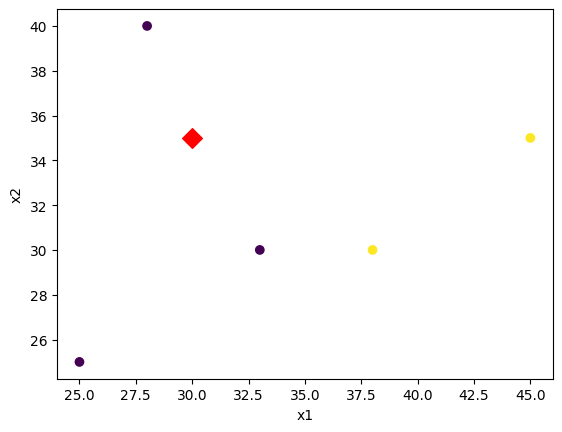

In [12]:
# 산포도
# 학습용 데이터
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

# 테스트용 데이터
plt.scatter(X_test[:,0], X_test[:,1], c='red', marker='D', s= 100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show

In [14]:
# 피처 스케일링
scalerX = StandardScaler()
scalerX.fit(X_train)
X_train_std = scalerX.transform(X_train)
print(X_train_std)

[[-1.23272999 -1.37281295]
 [-0.11206636 -0.39223227]
 [ 0.58834841 -0.39223227]
 [ 1.56892908  0.58834841]
 [-0.81248113  1.56892908]]


In [16]:
# 피처 스케일링 : 테스트용 데이터
X_test_std = scalerX.transform(X_test)
print(X_test_std)

[[-0.53231522  0.58834841]]


In [19]:
# 모형화
knn = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
# 학습
knn.fit(X_train_std, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [20]:
# 예측
pred = knn.predict(X_test_std)
print(pred)

[0]


In [21]:
# 클래스별 확률 값을 반환
knn.predict_proba(X_test_std)

array([[0.66666667, 0.33333333]])

In [24]:
# 인접한 k개의 개체들에 대한 거리와 색인을 반환
dist, index = knn.kneighbors(X_test_std)
print(dist)
print(index)

[[1.0198193  1.06683999 1.48910222]]
[[4 1 2]]


In [25]:
# 실습. 닥스훈트와 진돗개 분류 문제

In [28]:
# 닥스훈트의 길이와 높이 데이터
dach_length = [55,57,64,63,58,49,54,61]
dach_height = [30,31,36,30,33,25,37,34]

# 진돗개의 길이와 높이 데이터
jin_length = [56,47,56,46,49,53,52,48]
jin_height = [52,52,50,53,50,53,49,54]

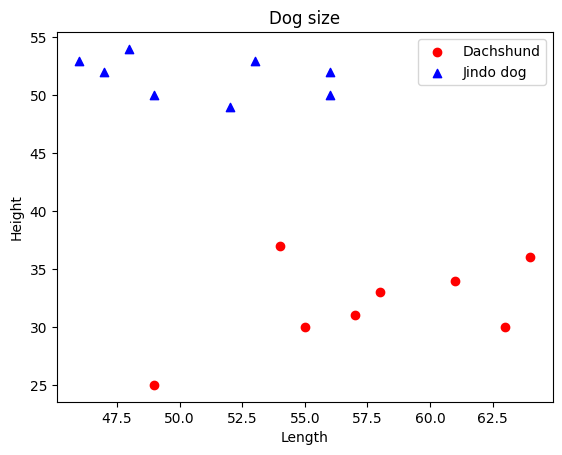

In [30]:
plt.scatter(dach_length, dach_height, c = 'r', label = "Dachshund")
plt.scatter(jin_length, jin_height, c= 'b', marker = '^', label = "Jindo dog")

plt.xlabel('Length')
plt.ylabel('Height')
plt.title("Dog size")
plt.legend(loc='upper right')

In [32]:
newdata_length = [59]
newdata_height = [35]

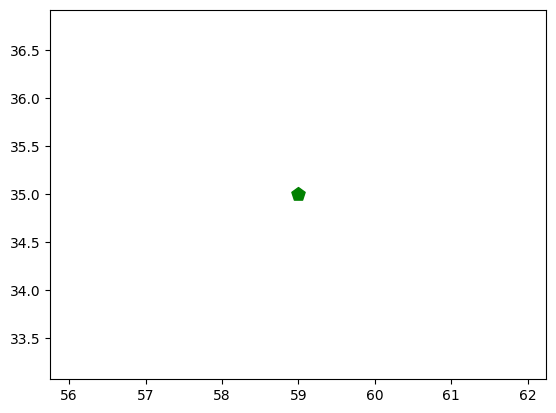

In [36]:
plt.scatter(newdata_length, newdata_height, s = 100, marker='p', c = 'g', label = 'new Data')

In [37]:
d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data))

In [39]:
j_data = np.column_stack((jin_length, jin_height))
j_label = np.ones(len(j_data))

newdata = [[59,35]]

In [43]:
dog_classes = {0:'닥터훈트',1:'진돗개'}
k = 3
knn = KNeighborsClassifier(n_neighbors= k)

dogs = np.concatenate((d_data, j_data),axis = 0)
labels = np.concatenate((d_label,j_label), axis=0)

knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print("데이터", newdata,', 판정 결과:', dog_classes[y_pred[0]])

데이터 [[59, 35]] , 판정 결과: 닥터훈트


In [46]:
# 실습. 붓꽃 분류 문제

from sklearn.datasets import load_iris

iris = load_iris()
iris.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [48]:
print('iris 데이터의 형태: ', iris.data.shape)
print('iris 데이터의 속성들: ', iris.feature_names)
print('iris 데이터의 레이블: ', iris.target)

iris 데이터의 형태:  (150, 4)
iris 데이터의 속성들:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris 데이터의 레이블:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [49]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Series(iris.target)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [50]:
iris_df['target'].value_counts()


,count
target,
0,50
1,50
2,50


In [51]:
iris_df.values

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [60]:
x = iris_df.iloc[:, :4]
y = iris_df.iloc[:, -1]

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


def iris_knn(X,y,k):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
  knn = KNeighborsClassifier(n_neighbors= k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  return metrics.accuracy_score(y_test, y_pred)



  k = 3
  scores = iris_knn(X,y,k)
  print('n_neighbors가 {0:d}일 때 정확도 : {1:.3f}'.format(k,scores))

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def iris_knn(x, y, k):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  return metrics.accuracy_score(y_test, y_pred)

k = 3
scores = iris_knn(x, y, k)
print("n_neighbors가 {0:d}일 때 정확도: {1:.3f}".format(k, scores))

n_neighbors가 3일 때 정확도: 0.956


In [67]:
#K - 최근접 이웃의 하이퍼파라미터

from sklearn.neighbors import KNeighborsRegressor # KNeighborsRegressor 변경됨
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


In [69]:
# 학습용 데이터(기존 개체)
# 입력 값

X_train = np.array([[25,25],
                    [33,30],
                    [38,30],
                    [45,35],
                    [28,40]])

# 목표 값
y_train = np.array([[10],[20],[30],[40],[50]])

In [70]:
# 테스트용 데이터(새로운 개체)
# 입력
X_test = np.array([[30,35]])

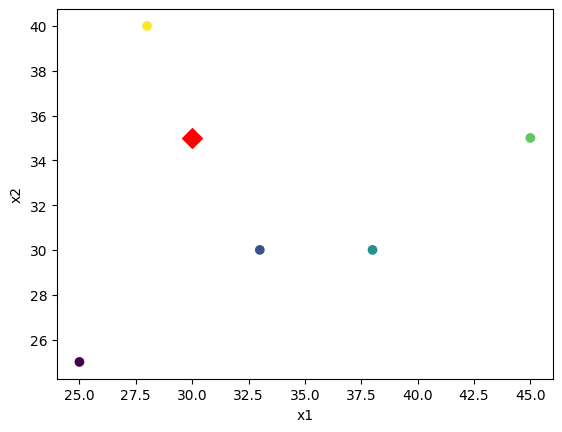

In [73]:
# 산포도
# 학습용 데이터
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
# 테스트용 데이터
plt.scatter(X_test[:,0], X_test[:,1], c= 'red', marker='D', s = 100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [76]:
# 피처 스케일링: 학습용 데이터
# 입력 값
scalerX = StandardScaler()
scalerX.fit(X_train)
X_train_std = scalerX.transform(X_train)
print(X_train_std)

# 목표값
scalerY = StandardScaler()
scalerY.fit(y_train)
y_train_std = scalerY.transform(y_train)
print(y_train_std)

[[-1.23272999 -1.37281295]
 [-0.11206636 -0.39223227]
 [ 0.58834841 -0.39223227]
 [ 1.56892908  0.58834841]
 [-0.81248113  1.56892908]]
[[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]


In [77]:
# 피처 스케일링: 테스트용 데이터
X_test_std = scalerX.transform(X_test)
print(X_test_std)

[[-0.53231522  0.58834841]]


In [79]:
# 모형화
knn = KNeighborsRegressor(n_neighbors = 3,metric='euclidean',weights = 'uniform')

# 학습
knn.fit(X_train_std, y_train_std)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

In [81]:
# 예측
y_pred = knn.predict(X_test_std)
print(y_pred)

# 예측 값의 역변환
y_pred_inverse = scalerY.inverse_transform(y_pred)
print(y_pred_inverse)

[[0.23570226]]
[[33.33333333]]


In [84]:
# 인접한 k개의 개체들에 대한 거리와 색인을 반환

dist,index = knn.kneighbors(X_test_std)
print(dist)
print(index)

[[1.0198193  1.06683999 1.48910222]]
[[4 1 2]]
